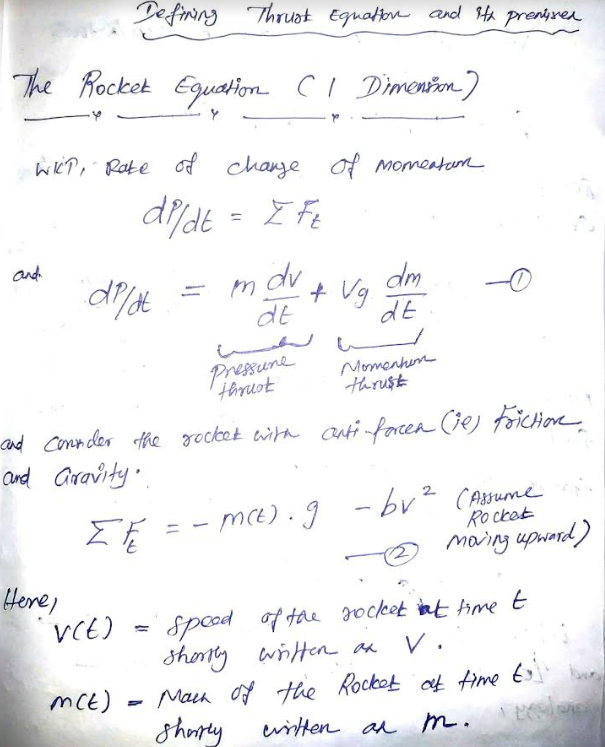

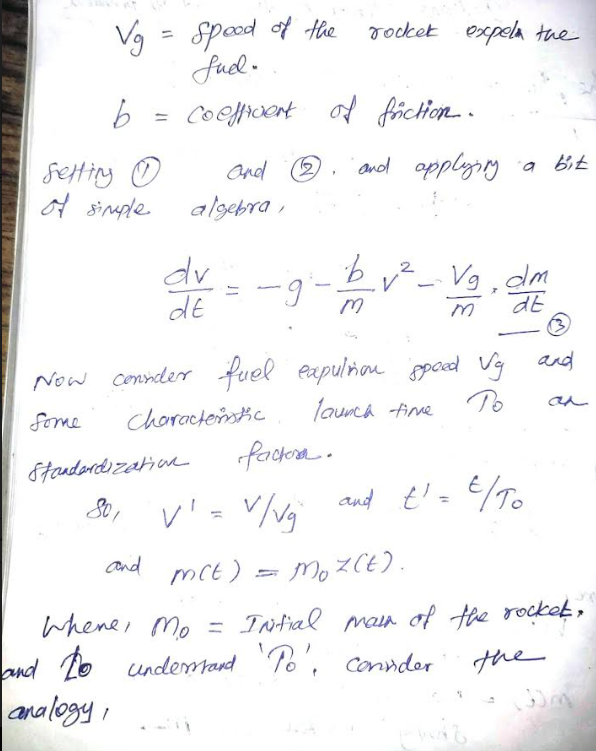

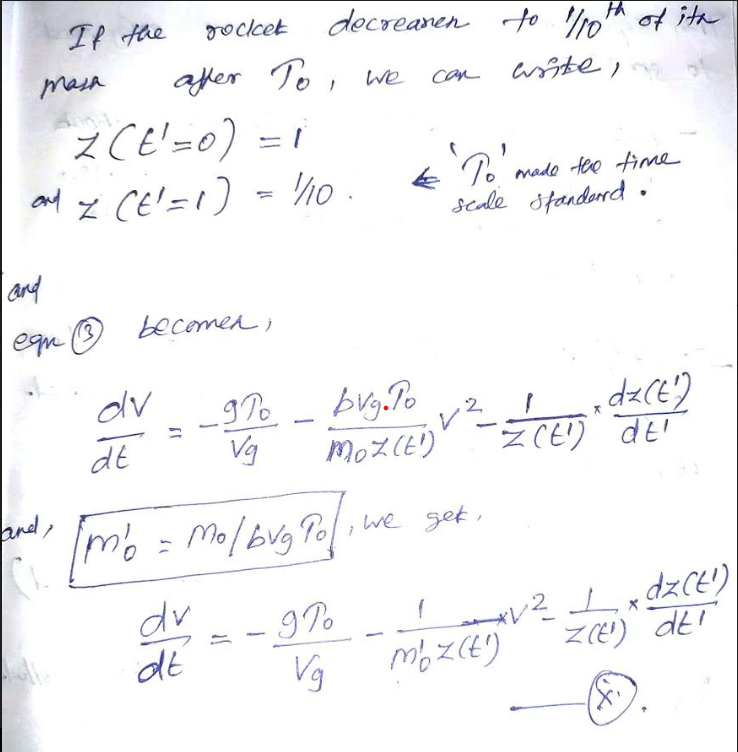

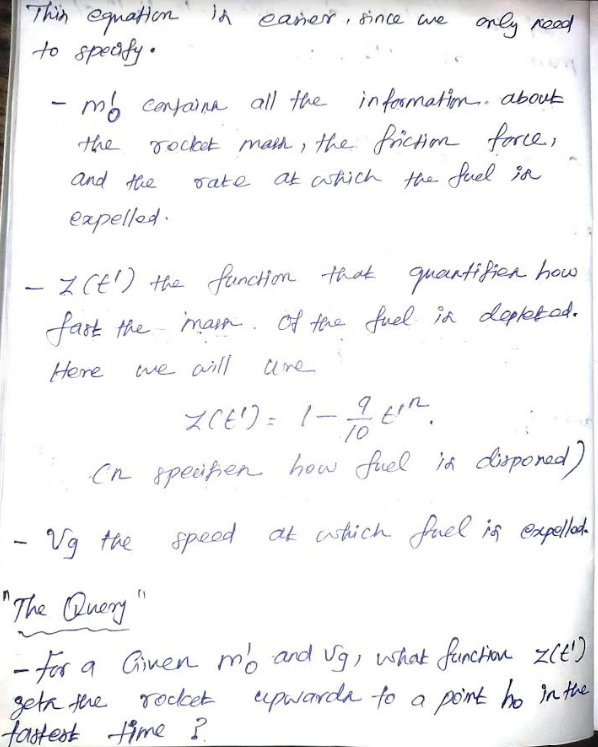

The 'ivp' stands for Initial Value Problem which means it can be used to solve problems where we know all the boundary conditions at a single point in space or time. solve_ivp is designed to trivially solve first order one dimensional equation.

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-notebook'])
import scipy as sp

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

SymPy is a Python library for symbolic mathematics. 

In [ ]:
import sympy as smp

Setting all our constants

In [ ]:
T0 = 40 # 40 second launch 
g = 9.81
vg = 500 # fuel emitted at 500m/s
M0 = 2e4 #20000kg rocket starting
b = 0.1 # coefficient of air friction
m0 = M0/(b*vg*T0)

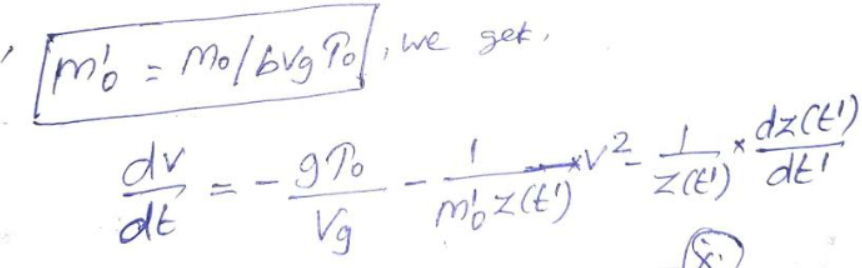

In [ ]:
g*T0/vg

0.7848

In [ ]:
M0/(b*vg*T0)

10.0

Step 1:

Use sympy to define fuel loss function $z(t)$ and get derivative $dz/dt$. Then convert these into numerical python functions

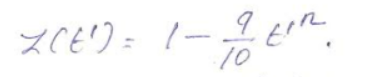

In [ ]:
t, n = smp.symbols('t n')
z = 1-(9/10)*t**n

In [ ]:
t,n

(t, n)

In [ ]:
z

1 - 0.9*t**n

In [ ]:
dzdt = smp.diff(z, t).simplify()

In [ ]:
dzdt

-0.9*n*t**(n - 1)

In [ ]:
# Get numerical functions
z = smp.lambdify([t, n], z)
dzdt = smp.lambdify([t, n], dzdt)

In [ ]:
z

<function _lambdifygenerated(t, n)>

In [ ]:
dzdt

<function _lambdifygenerated(t, n)>

Step 2:

Plot a few different ways to expell fuel

In [ ]:
t = np.linspace(1e-4, 1, 1000)          # 1000 finite timescale (0.0001 to 1)

In [ ]:
t.min()

0.0001

In [ ]:
t.max()

1.0

In [ ]:
t.shape

(1000,)

In [ ]:
t[0]

0.0001

In [ ]:
t

array([1.00000000e-04, 1.10090090e-03, 2.10180180e-03, 3.10270270e-03,
       4.10360360e-03, 5.10450450e-03, 6.10540541e-03, 7.10630631e-03,
       8.10720721e-03, 9.10810811e-03, 1.01090090e-02, 1.11099099e-02,
       1.21108108e-02, 1.31117117e-02, 1.41126126e-02, 1.51135135e-02,
       1.61144144e-02, 1.71153153e-02, 1.81162162e-02, 1.91171171e-02,
       2.01180180e-02, 2.11189189e-02, 2.21198198e-02, 2.31207207e-02,
       2.41216216e-02, 2.51225225e-02, 2.61234234e-02, 2.71243243e-02,
       2.81252252e-02, 2.91261261e-02, 3.01270270e-02, 3.11279279e-02,
       3.21288288e-02, 3.31297297e-02, 3.41306306e-02, 3.51315315e-02,
       3.61324324e-02, 3.71333333e-02, 3.81342342e-02, 3.91351351e-02,
       4.01360360e-02, 4.11369369e-02, 4.21378378e-02, 4.31387387e-02,
       4.41396396e-02, 4.51405405e-02, 4.61414414e-02, 4.71423423e-02,
       4.81432432e-02, 4.91441441e-02, 5.01450450e-02, 5.11459459e-02,
       5.21468468e-02, 5.31477477e-02, 5.41486486e-02, 5.51495495e-02,
      

In [ ]:
z1 = z(t, 1)
z2 = z(t, 0.7)
z3 = z(t, 5)

In [ ]:
z1

array([0.99991   , 0.99900919, 0.99810838, 0.99720757, 0.99630676,
       0.99540595, 0.99450514, 0.99360432, 0.99270351, 0.9918027 ,
       0.99090189, 0.99000108, 0.98910027, 0.98819946, 0.98729865,
       0.98639784, 0.98549703, 0.98459622, 0.98369541, 0.98279459,
       0.98189378, 0.98099297, 0.98009216, 0.97919135, 0.97829054,
       0.97738973, 0.97648892, 0.97558811, 0.9746873 , 0.97378649,
       0.97288568, 0.97198486, 0.97108405, 0.97018324, 0.96928243,
       0.96838162, 0.96748081, 0.96658   , 0.96567919, 0.96477838,
       0.96387757, 0.96297676, 0.96207595, 0.96117514, 0.96027432,
       0.95937351, 0.9584727 , 0.95757189, 0.95667108, 0.95577027,
       0.95486946, 0.95396865, 0.95306784, 0.95216703, 0.95126622,
       0.95036541, 0.94946459, 0.94856378, 0.94766297, 0.94676216,
       0.94586135, 0.94496054, 0.94405973, 0.94315892, 0.94225811,
       0.9413573 , 0.94045649, 0.93955568, 0.93865486, 0.93775405,
       0.93685324, 0.93595243, 0.93505162, 0.93415081, 0.93325

In [ ]:
z1.shape

(1000,)

In [ ]:
z1[0]

0.99991

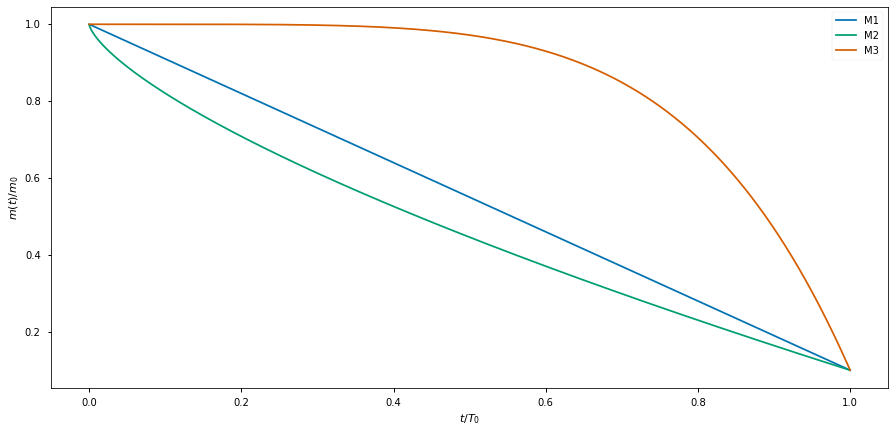

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(t, z1, label='M1')     # n = 1
plt.plot(t, z2, label='M2')     # n = 0.7
plt.plot(t, z3, label='M3')     # n = 5
plt.ylabel('$m(t)/m_0$')
plt.xlabel('$t/T_0$')
plt.legend()
plt.show()



> Fuel Loss Function Z1 (t,1) >> shows the fuel depletion in gradual right from beginning till empty..

> Fuel loss function Z2 (t,0.7) >> shows the fuel depletion in linear slope from the start till empty..

> Fuel Loss Function Z3(t,5) >> shows the fuel depletion stays almost no depletion for a while, then sudden depletion with high rate to become empty.

> The term empty refers 1/10 of vehicle weight without fuel...

> 9/10 of rocket weight is fuel which deplete over 't' timescale.











Step 3:

Define our ODE system $\vec{S} = (x, v)$ and $d\vec{S}/dt = (dx/dt, dv/dt)$

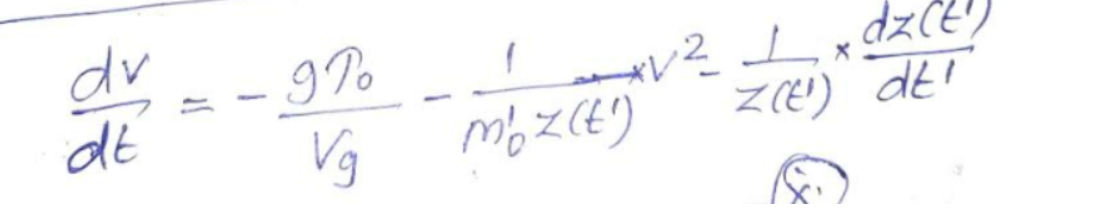

In [ ]:
def dSdt(t,S, m0, vg, n, T0=40):               # S = Initial zero term which carries initial position and initial velocity
    x, v = S[0], S[1]  #Initial position and Velocity
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]


> This function taking arguments of t,S,m0,vg,n,T0.

> Intial Velocity and position is given with S as [0,0].

> Whenever t < 1, (dv/dt) is calculated through the thrust equation.This is to be as continuous space with quite number of steps.

> When t reaches !< 1, (dv/dt) is calculated without last component of thrust equation which involves with fuel loss function and its derivative.

> Whenever dx/dt ie. change in position with respect to time (velocity) is less than zero, and dv/dt is also less than zero..the thrust considered as negative thrust.it happens when initial position is at zero..At this moment both dv/dt and dx/dt returns as zero.

> Objective of this functionality is to have dv/dt and dx/dt for 1000 't' values.And Check and compare the profile with To=40 sec..And t is to be defined as to have 1000 steps between 0.0001 and 3.i.e 120 sec.

> To Solve this ODE function, Initial Value Problem solver is introduced.







Solve for a few different ways to expell fuel

In [ ]:
n1, n2, n3 = 1, 0.7, 5
sol1 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n3, T0))



> Each Solver taking the argument of functionality dS/dt , y0 (initial position and velocity), t_evaluation (1000 steps between 0.0001 and 3), m0,vg,n,T0.

> Solver returns dx/dt and dv/dt with respect to 1000 't' steps.





In [ ]:
sol1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.00000000e-04, 3.10290290e-03, 6.10580581e-03, 9.10870871e-03,
       1.21116116e-02, 1.51145145e-02, 1.81174174e-02, 2.11203203e-02,
       2.41232232e-02, 2.71261261e-02, 3.01290290e-02, 3.31319319e-02,
       3.61348348e-02, 3.91377377e-02, 4.21406406e-02, 4.51435435e-02,
       4.81464464e-02, 5.11493493e-02, 5.41522523e-02, 5.71551552e-02,
       6.01580581e-02, 6.31609610e-02, 6.61638639e-02, 6.91667668e-02,
       7.21696697e-02, 7.51725726e-02, 7.81754755e-02, 8.11783784e-02,
       8.41812813e-02, 8.71841842e-02, 9.01870871e-02, 9.31899900e-02,
       9.61928929e-02, 9.91957958e-02, 1.02198699e-01, 1.05201602e-01,
       1.08204505e-01, 1.11207407e-01, 1.14210310e-01, 1.17213213e-01,
       1.20216116e-01, 1.23219019e-01, 1.26221922e-01, 1.29224825e-01,
       1.32227728e-01, 1.35230631e-01, 1.

Plot

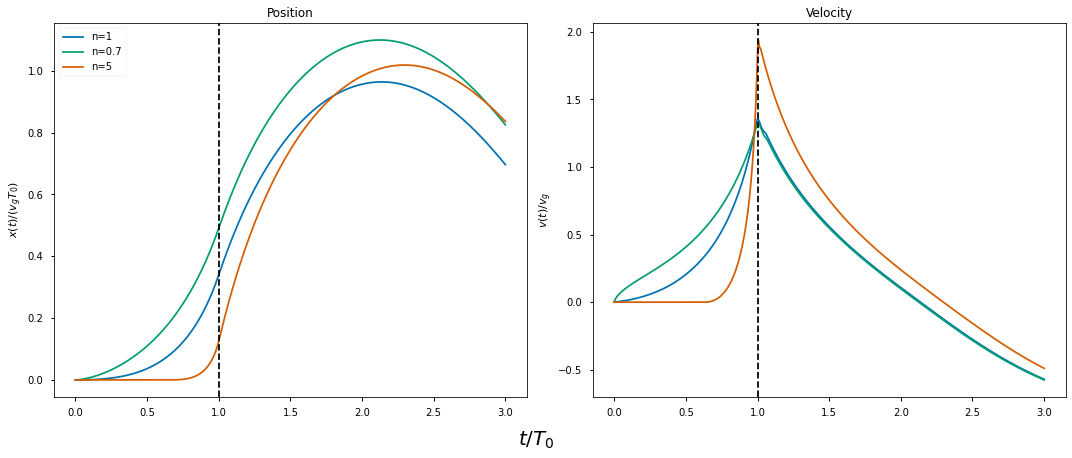

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.plot(sol1.t, sol1.y[0], label='n={}'.format(n1))
ax.plot(sol2.t, sol2.y[0], label='n={}'.format(n2))
ax.plot(sol3.t, sol3.y[0], label='n={}'.format(n3))
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()
ax = axes[1]
ax.plot(sol1.t, sol1.y[1], label='n=1')
ax.plot(sol2.t, sol2.y[1], label='n=0.7')
ax.plot(sol3.t, sol3.y[1], label='n=5')
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.5, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()

Inference:


> Total Rocket course time is 120 sec..First 40 sec is crucial.. 

> Launch is characterized by fuel loss function with n = 1,0.7,5 Known as n1, n2,n3 launch.

> n1 launch is powered by Z1>> Z(t,1) fuel loss function

> n2 launch is powered by Z2>> Z(t,0.7) fuel loss function

> n3 launch is powered by Z3>> Z(t,5) fuel loss function

> With respect to 1000 't' steps,  Altitute reaching smooth and optimum with n2 launch.But velocity was not high compared to n3 launch.

> n3 launch after first a while i.e till 1 time scale, not obtaining altitute but suddenly cruising to reach heights but unable to compete with n2 launch.But n3 launch reached highest velocity as it was cruising...

> With this, we can conclude n2 is steady and safe launch with optimal heigh and controlled velocity gain.

















If friction coefficient or factor b = 0 

In [ ]:
#No friction state
#When friction is zero..
#m0 = M0/(b*vg*T0)     , b = 0
m0 = np.inf

In [ ]:
def dSdt(t,S, m0, vg, n, T0=40):
    x, v = S[0], S[1]  #Initial position and Velocity
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]

In [ ]:
n1, n2, n3 = 1, 0.7, 5
sol1 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n3, T0))

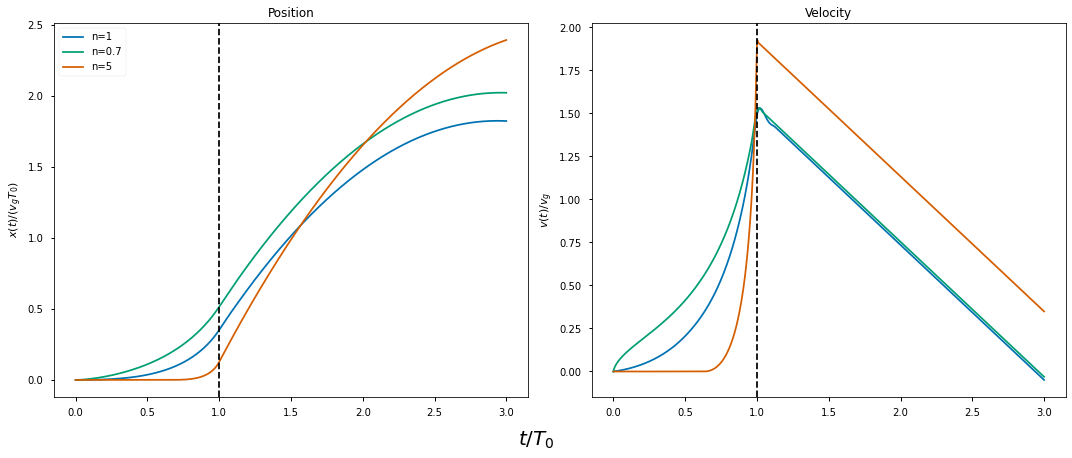

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0]
ax.plot(sol1.t, sol1.y[0], label='n={}'.format(n1))
ax.plot(sol2.t, sol2.y[0], label='n={}'.format(n2))
ax.plot(sol3.t, sol3.y[0], label='n={}'.format(n3))
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()
ax = axes[1]
ax.plot(sol1.t, sol1.y[1], label='n=1')
ax.plot(sol2.t, sol2.y[1], label='n=0.7')
ax.plot(sol3.t, sol3.y[1], label='n=5')
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.5, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()